In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.integrate import quad_vec, dblquad, tplquad
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import welch
from scipy import stats as st
#import PyQt5
from tqdm import tqdm
import rainflow
from scipy.stats import gaussian_kde
from scipy.integrate import simpson
from sklearn.decomposition import PCA
import random
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch
import gpytorch
from matplotlib import cm
from matplotlib.colors import LightSource

In [2]:
DEL= pd.read_excel(r'ML_course project.xlsx',sheet_name='damage')
Wave = pd.read_excel(r'ML_course project.xlsx',sheet_name='wave data')

In [3]:
D=[]
Hs=[]
Tp=[]
for i in range(len(Wave.iloc[:,0])):
    Hs.append(Wave.iloc[i,0])
    Tp.append(Wave.iloc[i,1])
    index=Wave.iloc[i,0]/0.05*201+(Wave.iloc[i,1]-2)/0.05
    D.append(DEL.iloc[int(index),2])

In [4]:
print('exact solution='+str(np.mean(D)))

exact solution=1.0243125490765762e-05


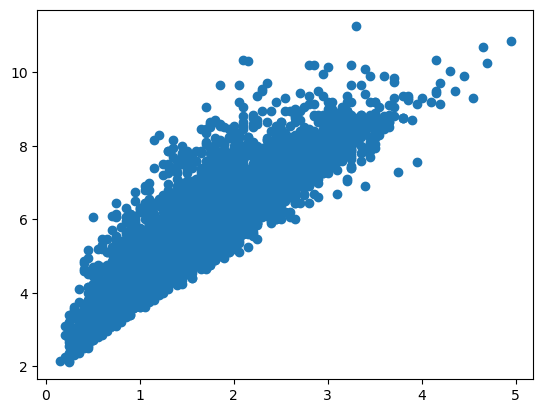

In [5]:
plt.scatter(Hs,Tp)

In [6]:
X = np.array([list(Hs),list(Tp)]).T
model = PCA(n_components=2)
pca = model.fit(X)
X_save = model.transform(X)

[-1.06097627 -0.00794805]
24911 0
[[1.   4.15]
 [1.85 6.1 ]]
[-1.12793962 -0.09472143]
24911 1
[[1.05 4.05]
 [0.95 4.25]
 [2.05 6.15]
 [1.65 6.05]]
[-1.0910004  -0.12129455]
24911 2
[[1.1  4.1 ]
 [0.95 4.05]
 [0.95 4.35]
 [2.15 6.25]
 [1.8  5.95]
 [1.6  6.15]]
[-1.05567122 -0.13761729]
24911 3
[[1.1  4.1 ]
 [1.   4.  ]
 [0.95 4.1 ]
 [0.95 4.4 ]
 [2.2  6.35]
 [1.85 6.  ]
 [1.75 5.95]
 [1.6  6.2 ]]
[-1.02214315 -0.14938099]
24911 4
[[1.15 4.15]
 [1.   4.  ]
 [0.95 4.05]
 [0.95 4.2 ]
 [0.95 4.45]
 [2.3  6.4 ]
 [1.9  6.  ]
 [1.8  5.95]
 [1.7  5.95]
 [1.6  6.25]]
[-0.99224075 -0.15882225]
24911 5
[[1.15 4.15]
 [1.   4.  ]
 [1.   4.05]
 [0.95 4.1 ]
 [0.95 4.25]
 [0.9  4.45]
 [2.35 6.45]
 [1.95 6.05]
 [1.85 6.  ]
 [1.75 5.95]
 [1.65 5.95]
 [1.55 6.3 ]]
[-0.9850934  -0.16647444]
24911 6
[[1.2  4.15]
 [1.05 4.05]
 [1.   4.  ]
 [0.95 4.05]
 [0.95 4.15]
 [0.95 4.25]
 [0.9  4.5 ]
 [2.35 6.5 ]
 [2.   6.1 ]
 [1.85 6.  ]
 [1.8  6.  ]
 [1.7  5.95]
 [1.65 5.95]
 [1.55 6.35]]
[-0.96790868 -0.17305389]
2

[-1.71848208 -0.12885008]
24911 4
[[0.85 3.5 ]
 [0.8  3.5 ]
 [0.75 3.5 ]
 [0.7  3.55]
 [0.65 3.6 ]
 [1.15 4.15]
 [1.1  4.2 ]
 [1.05 4.2 ]
 [1.   4.25]
 [0.9  4.3 ]
 [1.4  4.65]
 [1.3  4.75]
 [1.25 4.75]
 [1.2  4.8 ]
 [1.05 4.85]
 [1.65 5.2 ]
 [1.55 5.25]
 [1.5  5.25]
 [1.4  5.3 ]
 [1.25 5.4 ]
 [2.   5.85]
 [1.85 5.9 ]
 [1.75 5.95]
 [1.65 5.95]
 [1.5  6.05]
 [2.8  7.35]
 [2.45 7.05]
 [2.3  7.  ]
 [2.15 6.95]
 [1.95 7.3 ]]
[-1.68491753 -0.13516097]
24911 5
[[0.85 3.55]
 [0.8  3.5 ]
 [0.75 3.5 ]
 [0.75 3.5 ]
 [0.7  3.6 ]
 [0.65 3.65]
 [1.15 4.15]
 [1.1  4.2 ]
 [1.05 4.2 ]
 [1.   4.2 ]
 [0.95 4.25]
 [0.85 4.3 ]
 [1.4  4.65]
 [1.3  4.7 ]
 [1.3  4.75]
 [1.2  4.75]
 [1.15 4.8 ]
 [1.05 4.85]
 [1.7  5.2 ]
 [1.55 5.25]
 [1.5  5.25]
 [1.45 5.3 ]
 [1.4  5.3 ]
 [1.25 5.4 ]
 [2.   5.85]
 [1.85 5.9 ]
 [1.8  5.9 ]
 [1.75 5.95]
 [1.65 5.95]
 [1.5  6.05]
 [2.85 7.4 ]
 [2.5  7.05]
 [2.35 7.  ]
 [2.2  6.9 ]
 [2.15 6.95]
 [1.95 7.35]]
[-1.66578711 -0.14013722]
24911 6
[[0.9  3.55]
 [0.8  3.5 ]
 [0.75 3.45]

[-1.85623185 -0.13984098]
24911 7
[[0.8  3.4 ]
 [0.75 3.4 ]
 [0.7  3.4 ]
 [0.7  3.4 ]
 [0.7  3.4 ]
 [0.65 3.45]
 [0.65 3.5 ]
 [0.55 3.55]
 [1.1  3.95]
 [1.   3.95]
 [1.   4.  ]
 [0.95 4.  ]
 [0.9  3.95]
 [0.9  4.05]
 [0.9  4.05]
 [0.8  4.1 ]
 [1.25 4.35]
 [1.2  4.4 ]
 [1.15 4.4 ]
 [1.15 4.4 ]
 [1.1  4.45]
 [1.05 4.4 ]
 [1.   4.45]
 [0.9  4.55]
 [1.45 4.7 ]
 [1.35 4.75]
 [1.35 4.8 ]
 [1.3  4.8 ]
 [1.25 4.8 ]
 [1.2  4.8 ]
 [1.15 4.85]
 [1.05 4.9 ]
 [1.65 5.15]
 [1.55 5.15]
 [1.5  5.15]
 [1.45 5.2 ]
 [1.4  5.2 ]
 [1.4  5.25]
 [1.3  5.25]
 [1.15 5.35]
 [1.9  5.55]
 [1.75 5.6 ]
 [1.7  5.65]
 [1.65 5.65]
 [1.6  5.65]
 [1.55 5.7 ]
 [1.5  5.7 ]
 [1.35 5.8 ]
 [2.2  6.15]
 [2.05 6.2 ]
 [2.   6.25]
 [1.95 6.25]
 [1.9  6.25]
 [1.85 6.25]
 [1.75 6.3 ]
 [1.55 6.4 ]
 [3.05 7.6 ]
 [2.7  7.3 ]
 [2.55 7.25]
 [2.45 7.2 ]
 [2.35 7.15]
 [2.3  7.2 ]
 [2.2  7.25]
 [1.95 7.7 ]]
[-1.90383658 -0.02624413]
24911 0
[[0.7  3.4 ]
 [0.9  3.95]
 [1.05 4.3 ]
 [1.2  4.65]
 [1.35 5.  ]
 [1.5  5.35]
 [1.7  5.8 ]
 [1.95 6

[-1.93923363 -0.13439273]
24911 6
[[0.75 3.3 ]
 [0.7  3.35]
 [0.65 3.25]
 [0.65 3.35]
 [0.6  3.3 ]
 [0.65 3.4 ]
 [0.55 3.5 ]
 [1.   3.85]
 [0.95 3.85]
 [0.95 3.85]
 [0.9  3.85]
 [0.85 3.9 ]
 [0.85 3.9 ]
 [0.75 3.95]
 [1.2  4.15]
 [1.1  4.2 ]
 [1.05 4.2 ]
 [1.05 4.2 ]
 [1.   4.25]
 [0.95 4.25]
 [0.85 4.35]
 [1.3  4.45]
 [1.25 4.5 ]
 [1.2  4.55]
 [1.15 4.5 ]
 [1.1  4.55]
 [1.05 4.6 ]
 [0.95 4.65]
 [1.45 4.75]
 [1.4  4.8 ]
 [1.35 4.8 ]
 [1.3  4.85]
 [1.25 4.85]
 [1.2  4.85]
 [1.05 4.95]
 [1.65 5.1 ]
 [1.55 5.1 ]
 [1.5  5.15]
 [1.4  5.15]
 [1.4  5.2 ]
 [1.3  5.2 ]
 [1.15 5.3 ]
 [1.8  5.4 ]
 [1.7  5.45]
 [1.6  5.5 ]
 [1.55 5.5 ]
 [1.5  5.55]
 [1.45 5.6 ]
 [1.3  5.65]
 [2.   5.8 ]
 [1.85 5.9 ]
 [1.8  5.95]
 [1.75 5.95]
 [1.7  5.95]
 [1.65 6.  ]
 [1.45 6.05]
 [2.3  6.35]
 [2.15 6.45]
 [2.05 6.45]
 [2.05 6.5 ]
 [1.95 6.45]
 [1.9  6.5 ]
 [1.7  6.6 ]
 [3.1  7.75]
 [2.75 7.45]
 [2.6  7.35]
 [2.5  7.35]
 [2.4  7.3 ]
 [2.3  7.4 ]
 [2.05 7.85]]
[-1.93202096 -0.13911906]
24911 7
[[0.75 3.3 ]
 [0.7  3

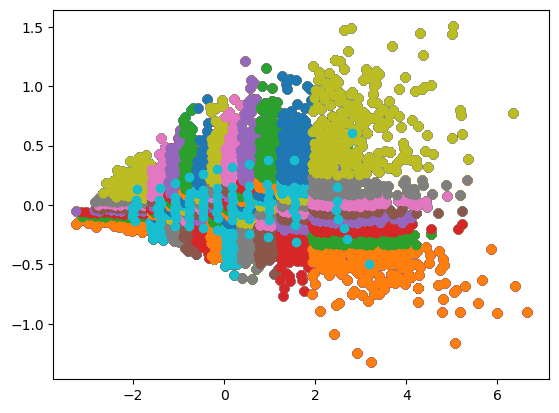

In [17]:
ymean=[]
xmean=[]
for m in range(10):
    for n in range(8):
        j=0
        gridx=2+m
        gridy=1+n
        H=X_save[:,0]
        T=X_save[:,1]
        D2=D
        H,T,D2= zip(*sorted(zip(H,T,D2)))
        RH=[]
        RT=[]
        ReD=[]
        #print(T,D2)
        for i in range(gridx):
            CH=H[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT=T[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CD=D[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT,CH,CD= zip(*sorted(zip(CT,CH,CD)))
            for j in range(gridy):
                DH=CH[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DT=CT[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DD=CD[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                plt.scatter(DH,DT)
                ReD.append(np.mean(DD))
                RH.append(np.mean(DH))
                RT.append(np.mean(DT))

        R=np.array([list(RH),list(RT)]).T
        print(R[0])
        SS=(model.inverse_transform(R))
        print(len(X_save[:,0]),j)
        Re=np.round(SS * 2,1) / 2
        print(Re)
        plt.scatter(R[:,0],R[:,1])
        PCAD=[]
        for k in range(gridx*gridy):
            index=Re[k,0]/0.05*201+(Re[k,1]-2)/0.05
            PCAD.append(DEL.iloc[int(index),2])
        ymean.append(np.mean(PCAD))
        xmean.append(gridx*gridy)

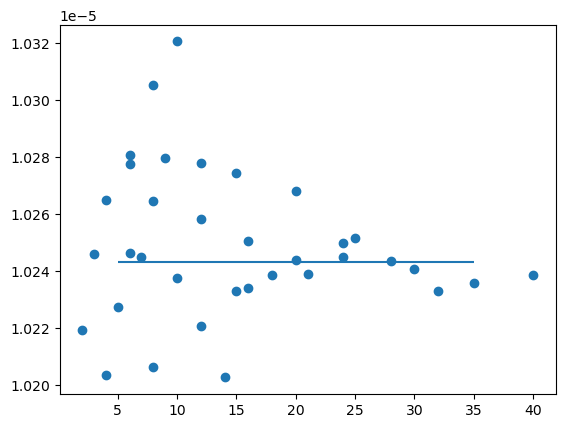

In [8]:
plt.scatter(xmean,ymean)
plt.hlines(1.0243125490765762e-05,5,35)

In [9]:
print(PCAD,ReD)
print((np.array(PCAD)-np.array(ReD))/np.array(ReD))

[9.52789905018435e-06, 9.501617316944828e-06, 9.501617316944828e-06, 9.511521063963714e-06, 9.508527723088999e-06, 9.740871976208867e-06, 9.692231592634884e-06, 9.649156849521502e-06, 9.565452274673783e-06, 9.5179160277183e-06, 9.516558740787175e-06, 9.491808000059455e-06, 9.456676742150644e-06, 9.45623356749172e-06, 9.4635634431778e-06, 9.512289585676742e-06, 9.496293932952661e-06, 9.498369067670005e-06, 9.471490333056899e-06, 9.50310205294022e-06, 9.844236375656337e-06, 9.747189995055614e-06, 9.709946598074176e-06, 9.689433731374277e-06, 9.61476474876833e-06, 1.054055990319662e-05, 1.0326044436716726e-05, 1.0206830423828067e-05, 1.0096420390002526e-05, 9.908799870235997e-06, 1.1879144204133085e-05, 1.1368559482365219e-05, 1.1044044559465885e-05, 1.0765886556197862e-05, 1.0407356892252676e-05, 1.4476618978514674e-05, 1.3122951328385714e-05, 1.273683281804638e-05, 1.2147560223106445e-05, 1.1333124058149455e-05] [9.539486287327227e-06, 9.530232671259502e-06, 9.501918599330031e-06, 9.521

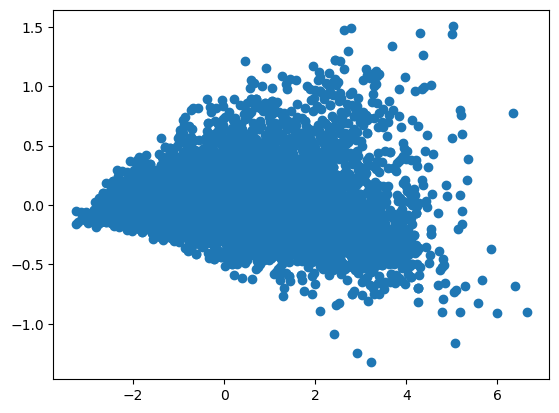

In [10]:
plt.scatter(X_save[:,0],X_save[:,1])

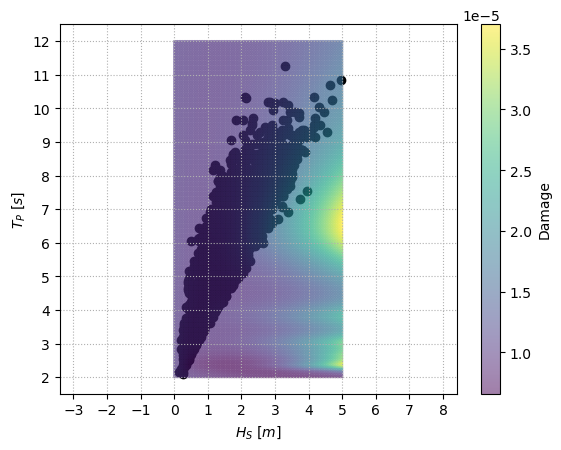

In [12]:
from sklearn.cluster import KMeans
SHs=[]
STp=[]
SD=[]
for i in range(len(DEL.iloc[:,0])):
    SHs.append(DEL.iloc[i,0])
    STp.append(DEL.iloc[i,1])
    SD.append(DEL.iloc[i,2])
plt.figure()
plt.scatter(Hs, Tp, color='k')
plt.scatter(SHs, STp, c=SD, cmap='viridis', s=0.5, alpha=0.5 )
cbar=plt.colorbar(label='Damage')
plt.xlabel('$H_S$ $[m]$'); plt.ylabel('$T_P$ $[s]$')
plt.grid(axis='both', linestyle=':');
plt.xticks(range(-3, 9, 1)); plt.yticks(range(2, 13, 1));
plt.axis('equal');


In [13]:
# (1) K-means clustering; damage by average

X=list(zip(Hs,Tp))
X=np.array(X)

k_values1=list(range(2,100))
epsilon=0.05

d_k_values1_avg=[]
for k in k_values1:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)
    
    # plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    # plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    # plt.xlabel('$H_S$ $[m]$')
    # plt.ylabel('$T_P$ $[s]$')
    # plt.grid(axis='both', linestyle=':')
    # plt.axis('equal')
    # plt.show();

    # Damage at cluster centers
    damage_values = []
    for i in range(k):
        condition = ( np.abs( SHs-cluster_centers[i,0] )<epsilon ) & ( np.abs( STp-cluster_centers[i,1] )<epsilon )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition].mean()
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i[0]}")

    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values1_avg.append(d_k)
    
print("\n**List of overall damage values for each k:")
print(d_k_values1_avg)

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of


**List of overall damage values for each k:
[1.0175853023757578e-05, 1.0235369796819888e-05, 1.0190861375121093e-05, 1.0195448116897691e-05, 1.0184972627884932e-05, 1.0220095407863624e-05, 1.0226694728359102e-05, 1.019182980701484e-05, 1.0207356099590178e-05, 1.0201854525643635e-05, 1.0215953748142721e-05, 1.0204619898787996e-05, 1.0198394051977657e-05, 1.0217564064347216e-05, 1.0203893563313098e-05, 1.0202591362788263e-05, 1.0215507980684107e-05, 1.0220788258714885e-05, 1.0218584261179354e-05, 1.021877897120989e-05, 1.0217454886513632e-05, 1.0227564785631522e-05, 1.0220223499889257e-05, 1.0223860058319009e-05, 1.022510036510142e-05, 1.022596774983124e-05, 1.0219458356739162e-05, 1.0229220682710561e-05, 1.022609275336392e-05, 1.0232673773066514e-05, 1.0228240719678895e-05, 1.0237249194408108e-05, 1.0227637197922218e-05, 1.022464487388189e-05, 1.0224279053408957e-05, 1.0230961340586792e-05, 1.0244259517514961e-05, 1.0230917316483648e-05, 1.0226423172892334e-05, 1.023690813208993e-05, 1

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


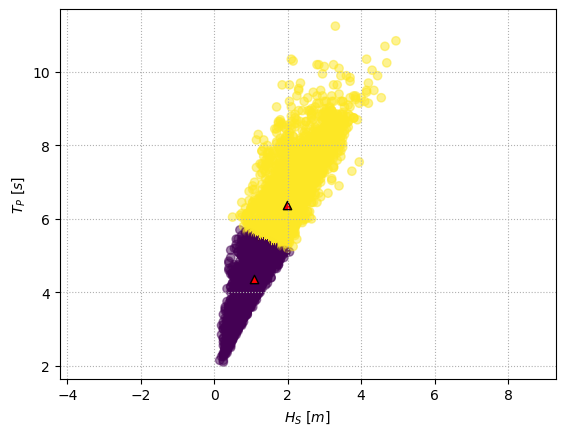

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


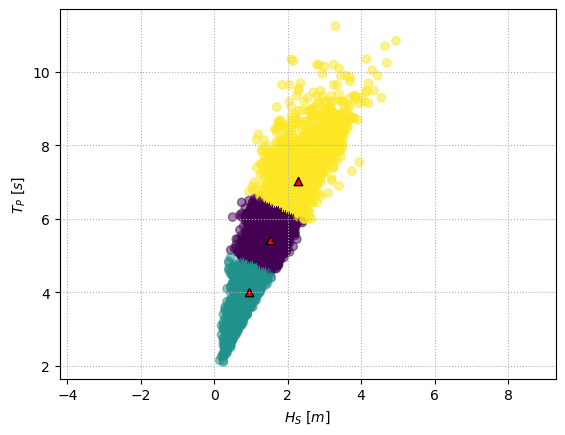

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


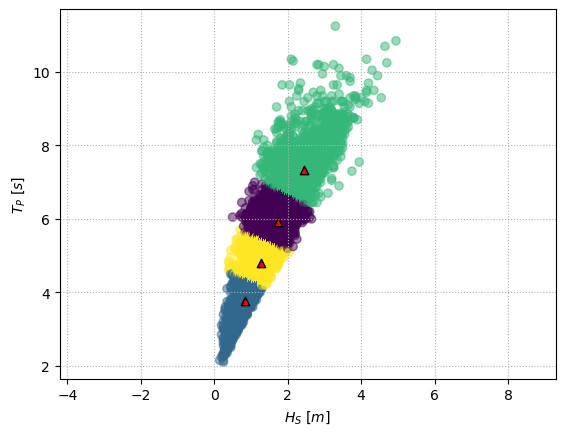

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


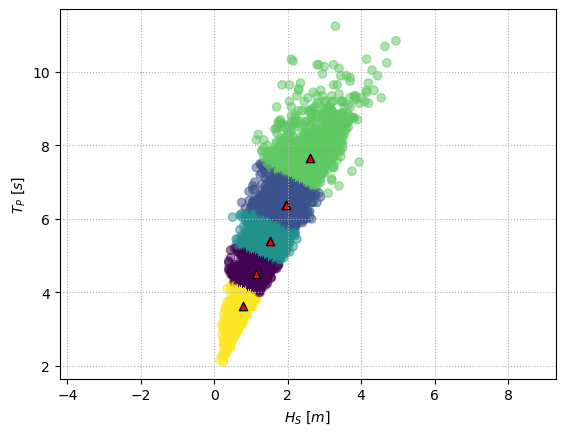

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


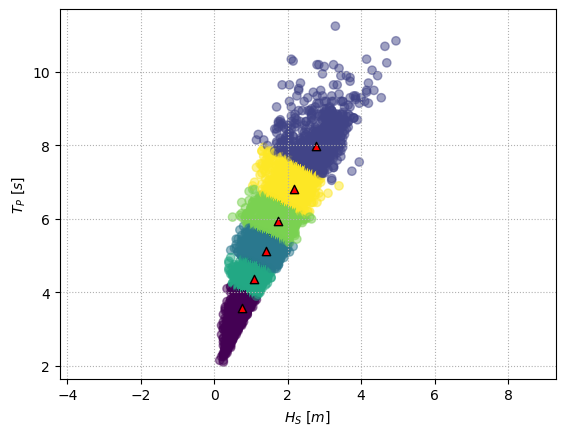

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


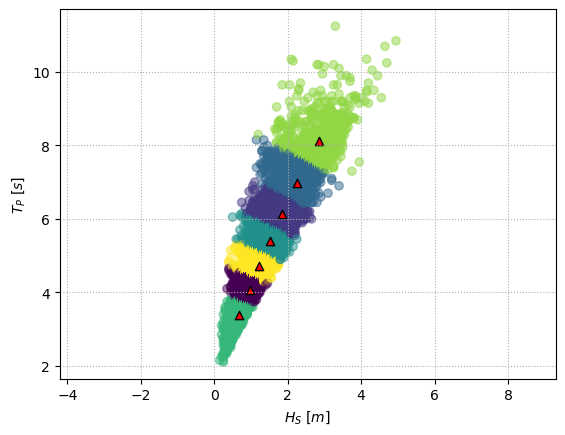

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


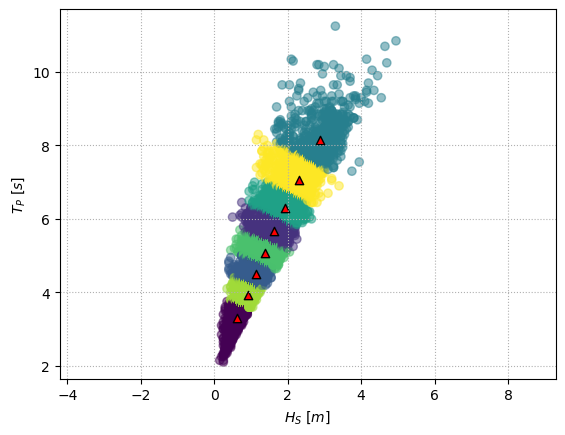

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


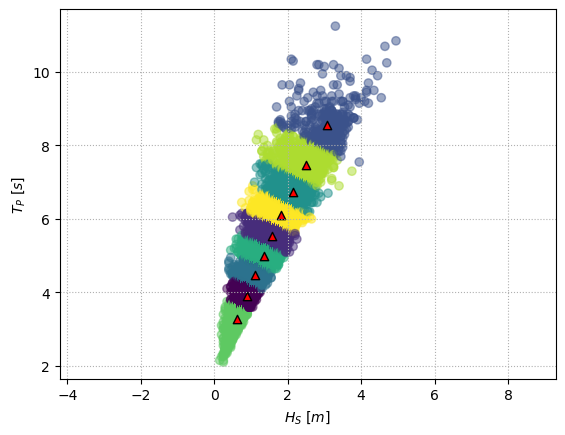

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


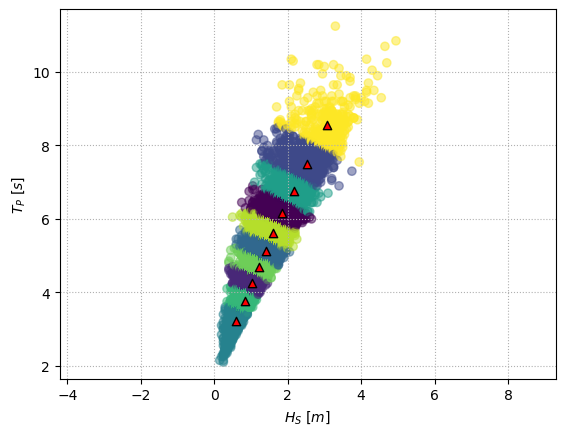

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


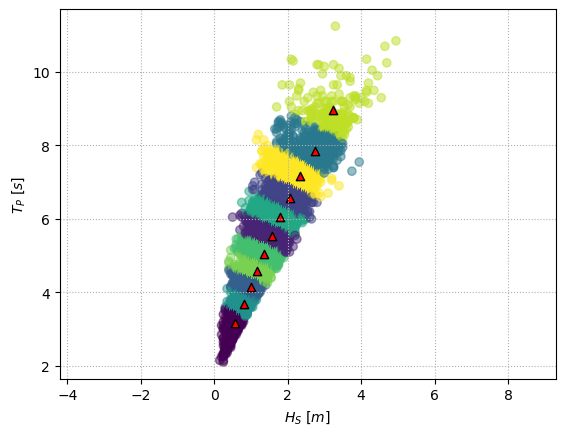

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


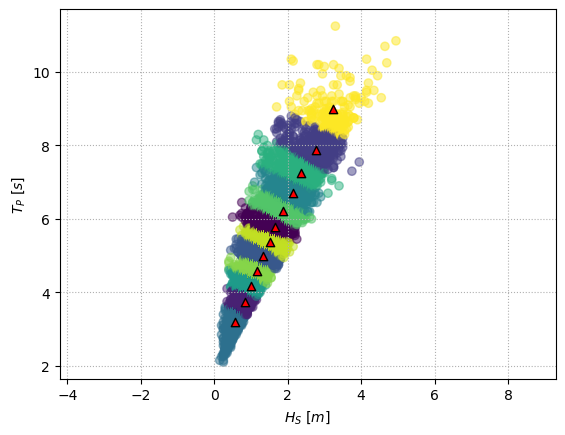

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


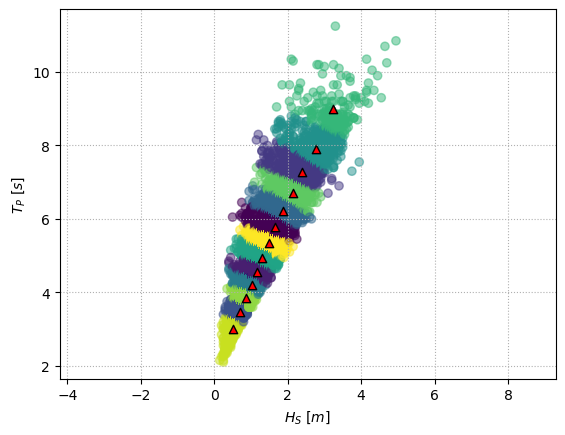

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


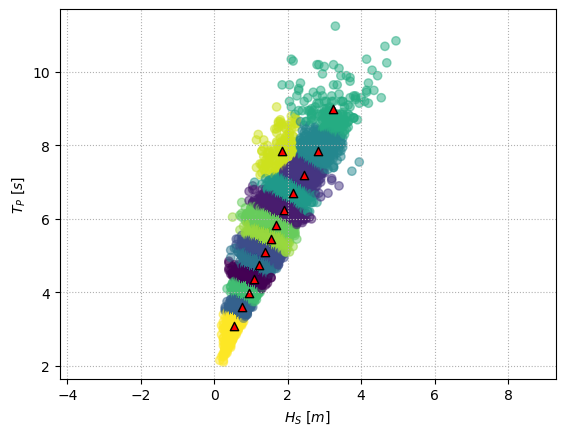

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


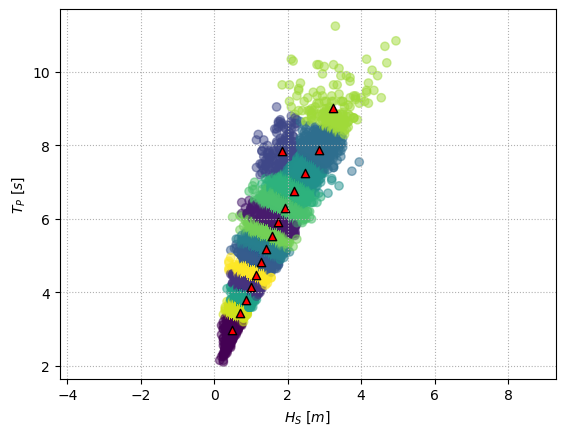

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


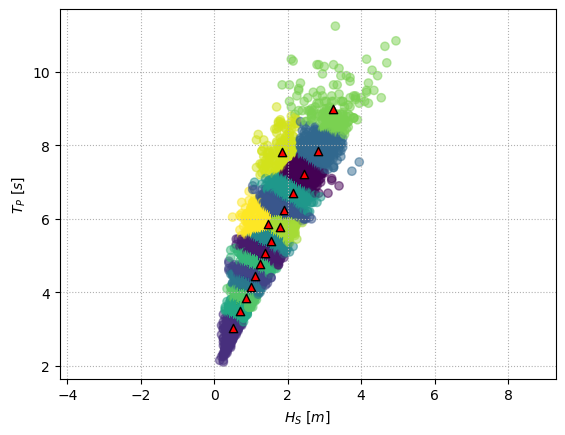

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


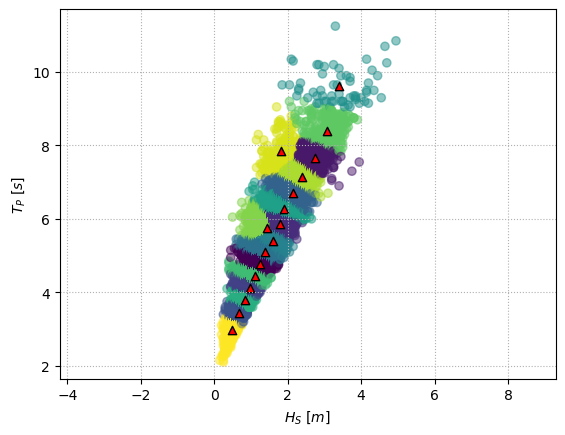

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


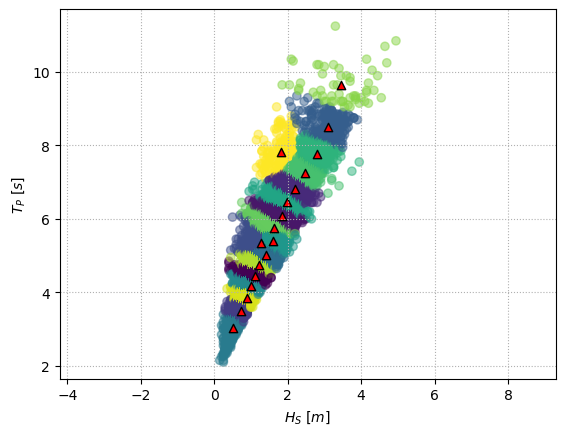

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


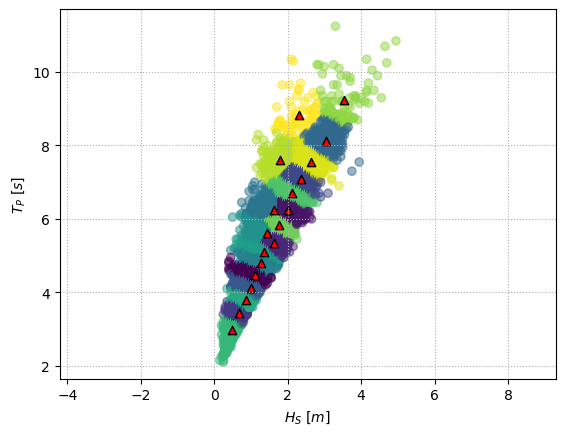

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


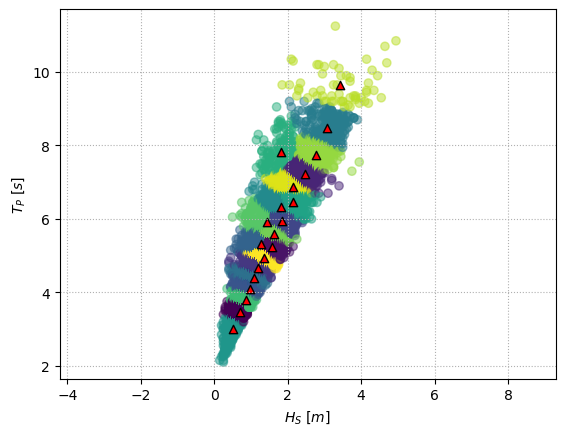

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


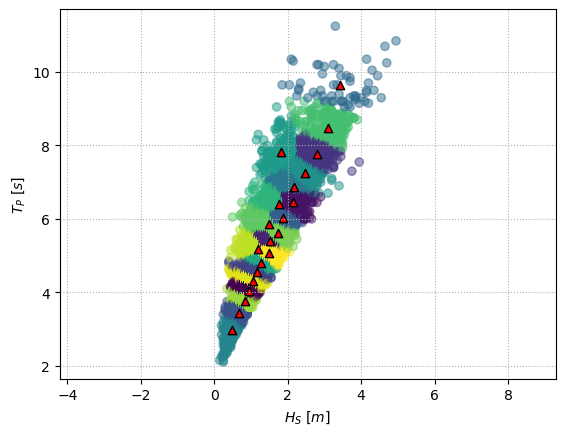

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


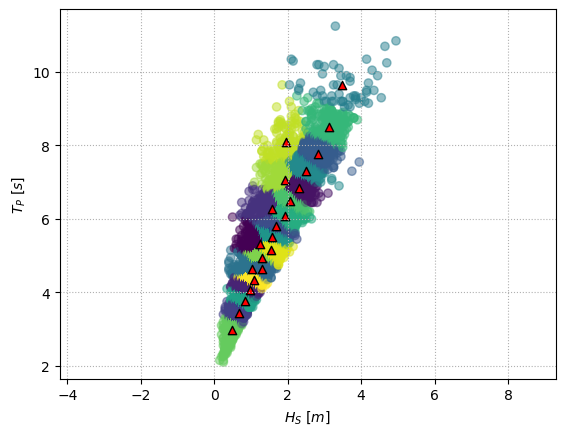

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


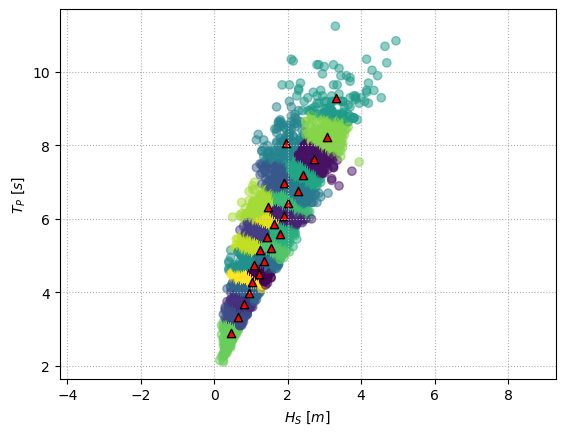

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


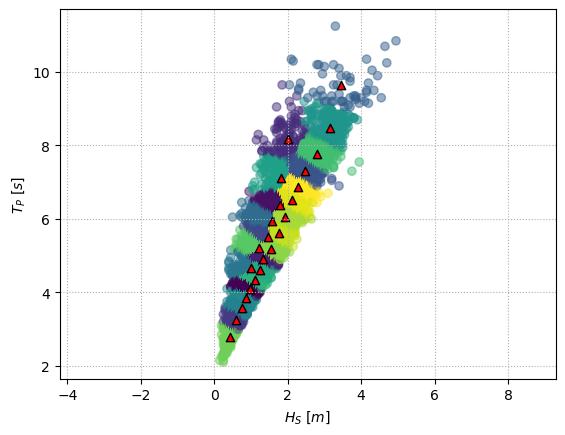

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


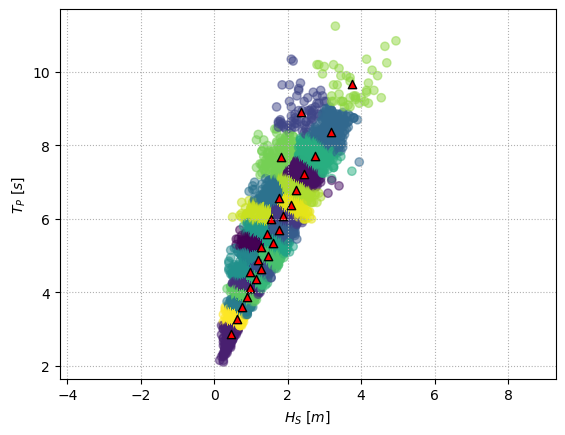

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


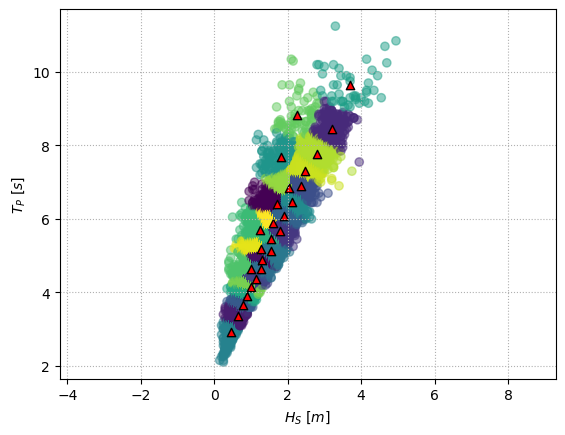

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


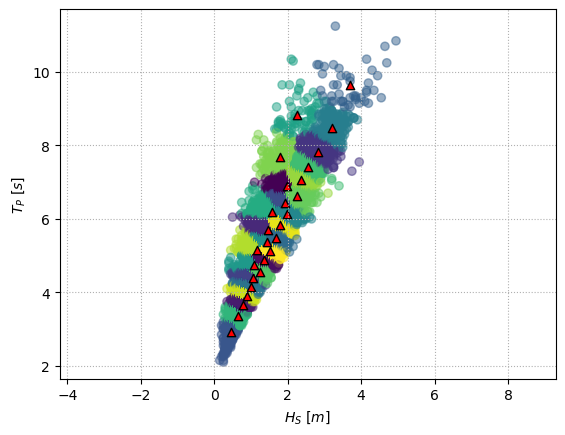

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


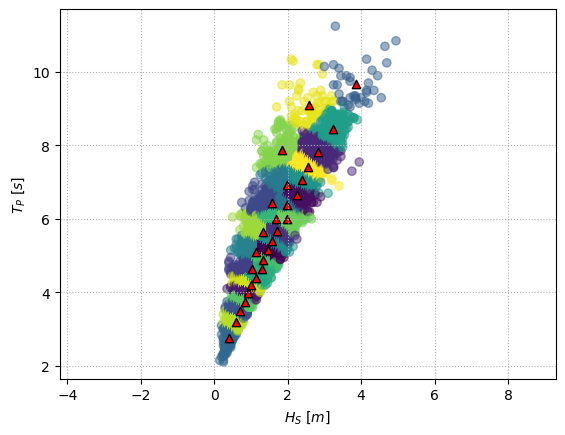

C:\Users\dl36596\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


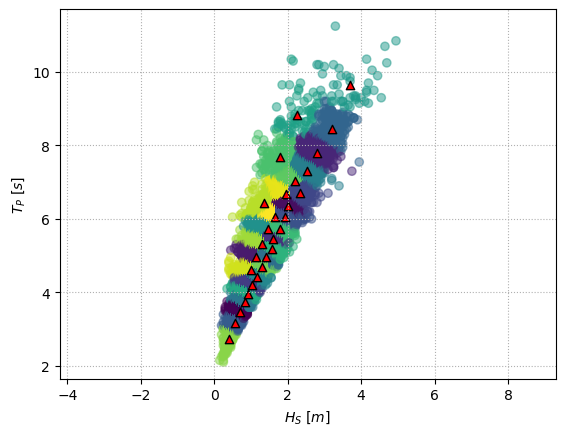


**List of overall damage values for each k:
[1.0149476615556559e-05, 1.0245503117477758e-05, 1.0206679555331085e-05, 1.0172612390937289e-05, 1.0218584426309536e-05, 1.0210701185706571e-05, 1.0210725982479623e-05, 1.0210271300489317e-05, 1.0190127555707513e-05, 1.0201300957941182e-05, 1.020080274391639e-05, 1.02183525078445e-05, 1.0215632748788552e-05, 1.0192710512951239e-05, 1.0215847019263227e-05, 1.0226548328847825e-05, 1.0221859335351615e-05, 1.0212562952007772e-05, 1.0210236767682714e-05, 1.0206304744203046e-05, 1.0225774814426882e-05, 1.0219293421025151e-05, 1.0230581326401884e-05, 1.022592577270362e-05, 1.0219767102986961e-05, 1.0225079443813888e-05, 1.0230906846051104e-05, 1.0232268149680625e-05]


In [20]:
# (2) K-means clustering; damage by distance

X=list(zip(Hs,Tp))
X=np.array(X)

k_values2=list(range(2,30))

d_k_values2_dis=[]
for k in k_values2:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(f"\n*Results for k={k} clusters:")
    # print("Cluster Centers:")
    # print(cluster_centers)
    
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='r', edgecolors='k', marker='^', label='Cluster Centers')
    plt.xlabel('$H_S$ $[m]$')
    plt.ylabel('$T_P$ $[s]$')
    plt.grid(axis='both', linestyle=':')
    plt.axis('equal')
    plt.show();

    # Damage at cluster centers
    cluster_centers_dis = np.round(cluster_centers*2,1)/2
    damage_values = []
    for i in range(k):
        condition = ( SHs==cluster_centers_dis[i,0] ) & ( STp==cluster_centers_dis[i,1] )
        # print("Number of SD values: ",np.count_nonzero(condition))
        damage_i = pd.DataFrame(SD).loc[condition]
        damage_values.append(damage_i)
        # print(f"Damage at cluster {i} center: {damage_i.iloc[0,0]}")
        
    # Probability of clusters
    cluster_counts = np.bincount(labels)
    cluster_prob = cluster_counts / len(labels)
    # print("Cluster Probabilities:")
    # print(cluster_prob)

    # Calculate the overall damage for the current value of k
    d_k = np.sum( np.array(damage_values).flatten() * cluster_prob[:k] )
    d_k = np.sum( np.array(damage_values).flatten() * np.array(cluster_prob) )
    # print(f"Overall damage for k={k}: {d_k}")
    d_k_values2_dis.append(d_k)
    
print("\n**List of overall damage values for each k:")
print(d_k_values2_dis)

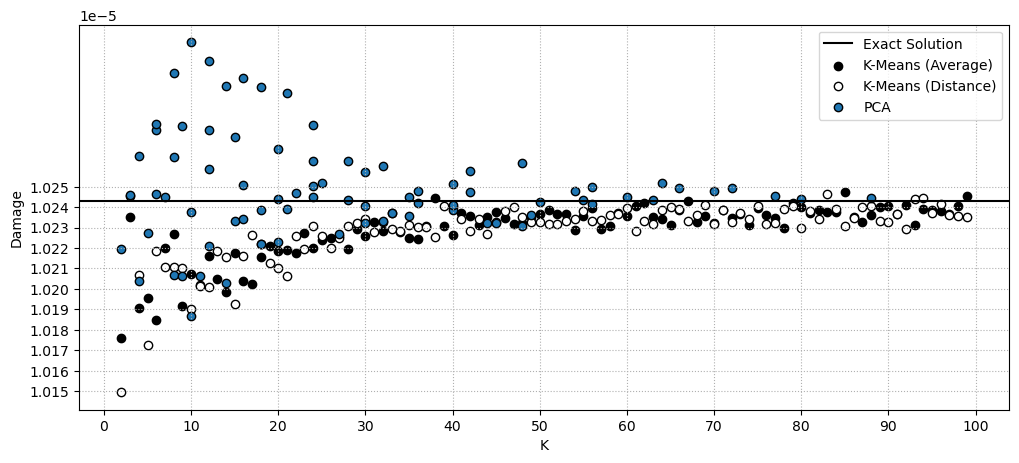

In [18]:
plt.figure(figsize=(12,5))
plt.axhline(y=np.mean(D), color='k', linestyle='-', label='Exact Solution')
plt.scatter(k_values1, d_k_values1_avg, color='k', edgecolor='k', marker='o', label='K-Means (Average)')
plt.scatter(k_values2, d_k_values2_dis, color='w', edgecolor='k', marker='o', label='K-Means (Distance)')
plt.scatter(xmean,ymean, color='C0', edgecolor='k', marker='o', label='PCA')
plt.xlabel('K'); plt.ylabel('Damage')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.yticks([1.015e-5,1.016e-5,1.017e-5,1.018e-5,1.019e-5,1.020e-5,1.021e-5,1.022e-5,1.023e-5,1.024e-5,1.025e-5])
plt.legend(); plt.grid(axis='both', linestyle=':'); plt.show();

In [19]:
xmean

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 3,
 6,
 9,
 12,
 15,
 18,
 21,
 24,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 7,
 14,
 21,
 28,
 35,
 42,
 49,
 56,
 8,
 16,
 24,
 32,
 40,
 48,
 56,
 64,
 9,
 18,
 27,
 36,
 45,
 54,
 63,
 72,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 11,
 22,
 33,
 44,
 55,
 66,
 77,
 88]